In [1]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
fname = '/Users/matthewgentry/Desktop/N_seaice_extent_daily_v3.0.csv'
data = np.genfromtxt(fname, skip_header=2, delimiter=',', usecols = (0, 1, 2, 3), dtype=[('year','|S8'), ('month','|S8'), ('day','|S8'), ('extent', '<f8')])


In [3]:
dtime = []
extent = []
for line in data:
    year = int(line[0])
    month = int(line[1])
    day = int(line[2])
    dtime0 = datetime(year, month, day)
    extent.append(line[3])
    dtime.append(dtime0)



In [4]:
june_extents = []
june_dates = []
for i, date in enumerate(dtime):
    if date.month == 5:
        june_extents.append(extent[i])
        june_dates.append(date)
        
last_years_index = 0
dates_by_year = []
extents_by_year = []
for i, date in enumerate(june_dates):
    if i < len(june_dates)-1:
        if june_dates[i+1].year != june_dates[i].year:
            dates_by_year.append(june_dates[last_years_index:i])
            extents_by_year.append(june_extents[last_years_index:i])
            last_years_index = i
    else:
        dates_by_year.append(june_dates[last_years_index:])
        extents_by_year.append(june_extents[last_years_index:])

june_slopes = []
june_yint = []
june_years = []
for i, dates in enumerate(dates_by_year):
    day = []
    for date in dates:
        day.append(date.day)
    fit = np.polyfit(day, extents_by_year[i], deg=1)
    june_slopes.append(fit[0])
    june_yint.append(fit[1])
    june_years.append(date.year)
    
mean_june_extent = []    
for extents in extents_by_year:
    mean_june_extent.append(np.mean(extents))

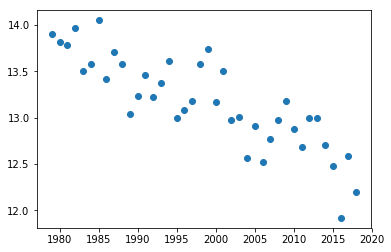

In [5]:
plt.plot(june_years, mean_june_extent, 'o')
plt.show()

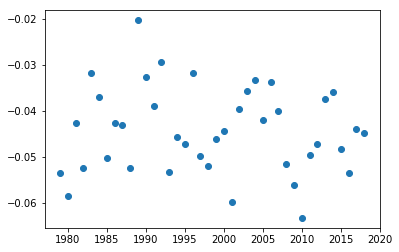

In [6]:
plt.plot(june_years, june_slopes, 'o')
plt.show()

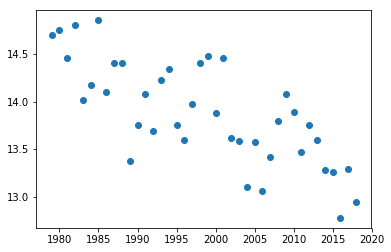

In [7]:
plt.plot(june_years, june_yint, 'o')
plt.show()

In [8]:
sept_extents = []
sept_dates = []
for i, date in enumerate(dtime):
    if date.month == 9:
        sept_extents.append(extent[i])
        sept_dates.append(date)
print(sept_dates[0].year, sept_dates[-1].year)   

1979 2017


In [9]:
min_extent = []
min_date = []
min_extent.append(sept_extents[0])
for i, date in enumerate(sept_dates):
    if i == len(sept_extents)-1:
        min_date.append(date)
        break
    if sept_dates[i].year == sept_dates[i+1].year:
        if min_extent[-1] > sept_extents[i+1]:
            min_extent[-1] = sept_extents[i+1]
    else:
        min_extent.append(sept_extents[i+1])
        min_date.append(date)

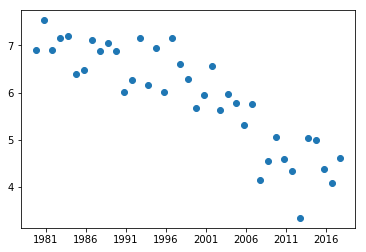

In [10]:
plt.plot(min_date, min_extent, 'o')
plt.show()

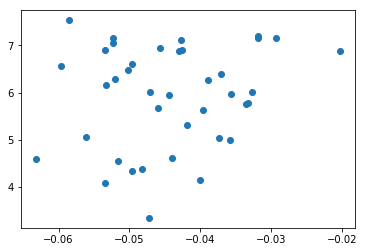

In [11]:
plt.plot(june_slopes[:-1], min_extent, 'o')
plt.show()

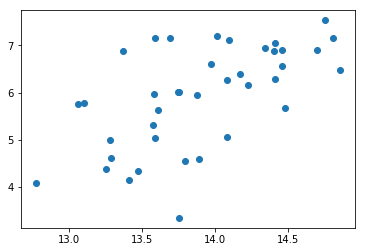

In [12]:
plt.plot(june_yint[:-1], min_extent, 'o')
plt.show()

In [136]:
june_fit = np.polyfit(mean_june_extent[:-1], min_extent, deg=1)
june_line = np.polyval(june_fit, mean_june_extent[:-1])
june_prediction = np.polyval(june_fit, mean_june_extent)
june_residual = min_extent - june_line
print(june_prediction[-1])

4.28493174978


In [137]:
sine_correction = -0.0*np.sin(1.0*np.array(mean_june_extent)+1.0)
corrected = np.array(june_prediction) + sine_correction
corrected_residual = min_extent-corrected[:-1]
print(corrected[-1])

4.28493174978


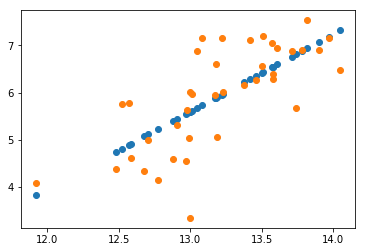

In [138]:
plt.plot(mean_june_extent[:-1], corrected[:-1],'o')
plt.plot(mean_june_extent[:-1], min_extent, 'o')
plt.show()

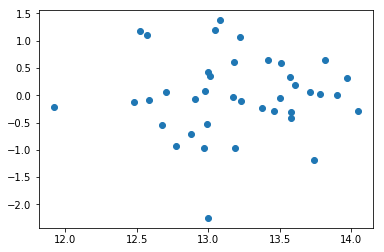

In [118]:
plt.plot(mean_june_extent[:-1], corrected_residual, 'o')
plt.show()

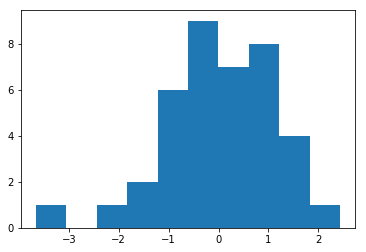

In [119]:
plt.hist(corrected_residual+residual, bins=10)
plt.show()

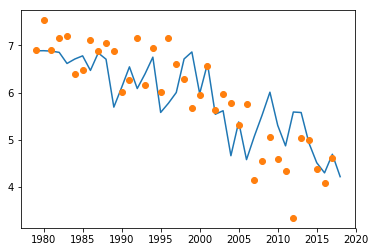

In [120]:
plt.plot(june_years, june_prediction)
plt.plot(june_years[:-1], min_extent, 'o')
plt.show()

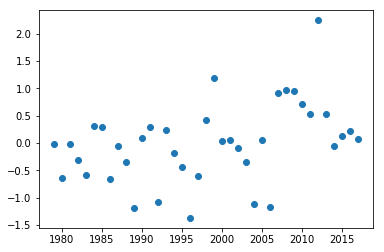

In [121]:
plt.plot(june_years[:-1], june_line-min_extent, 'o')
plt.show()

In [122]:
years = []
for date in min_date:
    years.append(date.year)
fit, c = np.polyfit(years, min_extent, deg=1, cov=True)
line = np.polyval(fit, years)

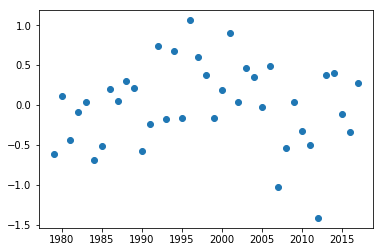

In [123]:
residual = min_extent-line
plt.plot(years, min_extent-line, 'o')
plt.show()

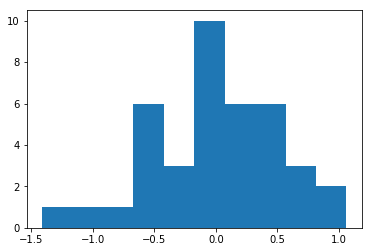

In [124]:
plt.hist(residual, bins=10)
plt.show()

In [125]:
np.mean(residual)

3.6597505652771826e-14

In [126]:
m = []
for N in range(2,37):
    mean_res = []
    for i in range(len(years)-N):
        mean = np.mean(residual[i:i+N])
        mean_res.append(mean)
    m.append(mean_res[-1])

In [127]:
c

array([[  5.91778960e-05,  -1.18237436e-01],
       [ -1.18237436e-01,   2.36245894e+02]])

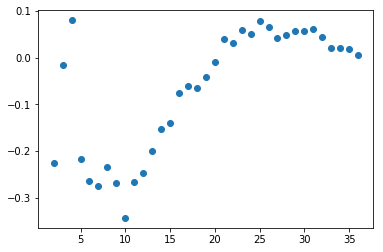

In [128]:
plt.plot(range(2,37),m, 'o')
plt.show()

In [129]:
min(min_extent)

3.3399999999999999

In [139]:
fit_guess=np.polyval(fit, june_years)

In [131]:
deviation = np.mean(residual[4:10])

In [132]:
(fit_guess + june_prediction[-1])/2.0

array([ 5.85804266,  5.81639327,  5.77474388,  5.73309448,  5.69144509,
        5.6497957 ,  5.60814631,  5.56649691,  5.52484752,  5.48319813,
        5.44154874,  5.39989934,  5.35824995,  5.31660056,  5.27495116,
        5.23330177,  5.19165238,  5.15000299,  5.10835359,  5.0667042 ,
        5.02505481,  4.98340542,  4.94175602,  4.90010663,  4.85845724,
        4.81680785,  4.77515845,  4.73350906,  4.69185967,  4.65021027,
        4.60856088,  4.56691149,  4.5252621 ,  4.4836127 ,  4.44196331,
        4.40031392,  4.35866453,  4.31701513,  4.27536574,  4.23371635])

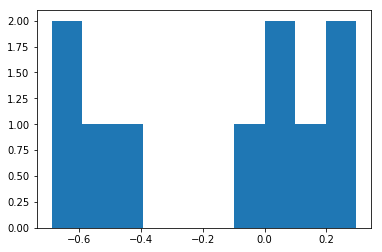

In [133]:
plt.hist(residual[0:10])
plt.show()

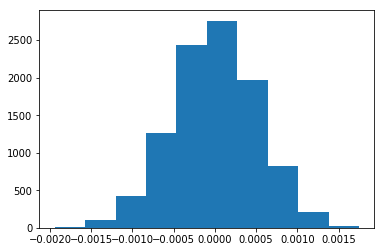

In [134]:
boot_strap = np.random.choice(residual, size=(100, 10000))
boot_mean = sum(boot_strap)/10000.0
plt.hist(boot_mean)
plt.show()

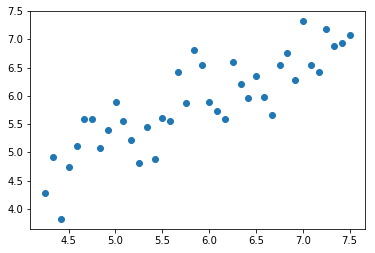

In [140]:
plt.plot(fit_guess, june_prediction, 'o')
plt.show()